 # Analysis of Heart Attack Cases in India

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.warn('This will not show')

 # Data collecting and preprocessing

In [5]:
data=pd.read_csv('heart_attack_cases_india.csv')
data

,Patient_ID,Name,Age,Gender,Region,Hospital,Admission_Date,Cholesterol_Level,BP_Systolic,BP_Diastolic,Blood_Sugar,Heart_Rate,Smoking,Diabetes,Obesity,Family_History,Exercise_Level,ECG_Result,Previous_Heart_Issue,Heart_Attack
0,PID100000,Yolanda King,68,Female,Northeast,Torres-Pham,2025-03-10,183.4,178,67,176.2,119,Yes,Yes,Yes,Yes,Moderate,Normal,No,Yes
1,PID100001,Jessica Moore,81,Male,West,Howard Ltd,2023-07-07,224.6,151,94,71.8,69,No,No,Yes,Yes,Low,Normal,Yes,No
2,PID100002,Kevin Wade,58,Male,West,Jones Inc,2024-11-01,173.1,101,86,155.4,148,No,No,No,No,Low,Normal,No,No
3,PID100003,Mrs. Ashley Cooper MD,44,Male,Northeast,Burgess-Johnson,2023-03-31,203.3,124,84,117.5,112,No,No,No,No,Low,Abnormal,No,No
4,PID100004,Carmen Smith,72,Male,East,"Jones, Romero and Edwards",2024-02-09,138.2,112,77,149.5,139,No,No,No,Yes,Moderate,Normal,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,PID101995,Mr. Dustin Burch,66,Male,West,"Reid, Mcdonald and Kaiser",2023-03-11,187.6,101,118,80.9,119,No,No,No,No,Moderate,Abnormal,No,Yes
1996,PID101996,Jay Meyer,54,Female,North,Hill Inc,2023-02-03,154.5,188,117,158.6,57,No,No,No,Yes,High,Borderline,No,No
1997,PID101997,Virginia Acosta,77,Female,West,May Group,2024-03-20,305.4,148,71,158.4,94,Yes,No,Yes,Yes,Moderate,Borderline,No,No
1998,PID101998,Alyssa Harrison,30,Male,North,Garcia and Sons,2023-11-01,165.4,169,107,157.0,83,No,No,No,No,Moderate,Borderline,No,No


In [6]:
data.shape

(2000, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient_ID            2000 non-null   object 
 1   Name                  2000 non-null   object 
 2   Age                   2000 non-null   int64  
 3   Gender                2000 non-null   object 
 4   Region                2000 non-null   object 
 5   Hospital              2000 non-null   object 
 6   Admission_Date        2000 non-null   object 
 7   Cholesterol_Level     2000 non-null   float64
 8   BP_Systolic           2000 non-null   int64  
 9   BP_Diastolic          2000 non-null   int64  
 10  Blood_Sugar           2000 non-null   float64
 11  Heart_Rate            2000 non-null   int64  
 12  Smoking               2000 non-null   object 
 13  Diabetes              2000 non-null   object 
 14  Obesity               2000 non-null   object 
 15  Family_History       

In [8]:
num=data.select_dtypes('number').columns
num

Index(['Age', 'Cholesterol_Level', 'BP_Systolic', 'BP_Diastolic',
       'Blood_Sugar', 'Heart_Rate'],
      dtype='object')

In [9]:
cat=data.select_dtypes('O').columns
cat

Index(['Patient_ID', 'Name', 'Gender', 'Region', 'Hospital', 'Admission_Date',
       'Smoking', 'Diabetes', 'Obesity', 'Family_History', 'Exercise_Level',
       'ECG_Result', 'Previous_Heart_Issue', 'Heart_Attack'],
      dtype='object')

In [10]:
# Drop irrelevant columns (Name, Hospital)
data.drop(['Patient_ID','Admission_Date','Name','Hospital'], axis=1, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2000 non-null   int64  
 1   Gender                2000 non-null   object 
 2   Region                2000 non-null   object 
 3   Cholesterol_Level     2000 non-null   float64
 4   BP_Systolic           2000 non-null   int64  
 5   BP_Diastolic          2000 non-null   int64  
 6   Blood_Sugar           2000 non-null   float64
 7   Heart_Rate            2000 non-null   int64  
 8   Smoking               2000 non-null   object 
 9   Diabetes              2000 non-null   object 
 10  Obesity               2000 non-null   object 
 11  Family_History        2000 non-null   object 
 12  Exercise_Level        2000 non-null   object 
 13  ECG_Result            2000 non-null   object 
 14  Previous_Heart_Issue  2000 non-null   object 
 15  Heart_Attack         

 # Data cleaning

In [13]:
#checking values
missing_number=data.isnull().sum()
missing_percentage=data.isnull().sum()/data.shape[0]*100
missing_values=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing numbers','missing percentage'])
missing_values=missing_values[missing_number>0]
missing_values

,missing numbers,missing percentage


In [14]:
data.duplicated().sum()

0

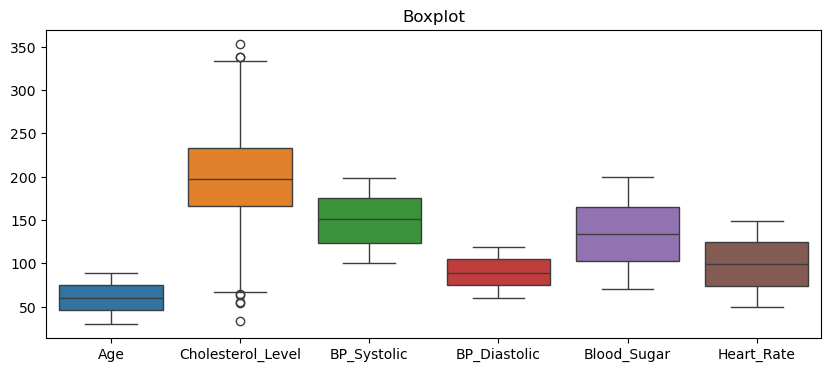

In [15]:
plt.figure(figsize=(10, 4))
sns.boxplot(data)  
plt.title("Boxplot")
plt.show()

In [16]:
pip install datasist

Note: you may need to restart the kernel to use updated packages.


In [17]:
from datasist.structdata import detect_outliers
idx=detect_outliers(
    data=data,
    n=0,
    features=['Cholesterol_Level']
)

In [18]:
data=data.drop(index=idx)

plt.figure(figsize=(10, 4))
sns.boxplot(data)  
plt.title("Boxplot")
plt.show()

 # Exploratory Data Analysis

 ### How does Age relate to the likelihood of a heart attack?

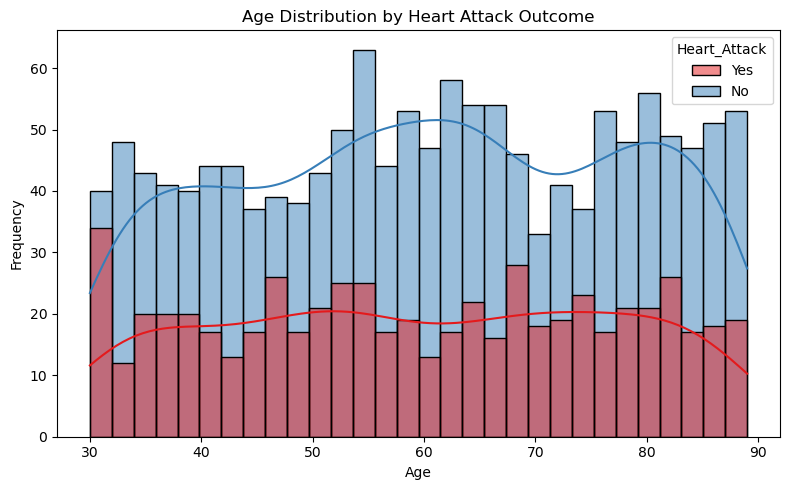

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Age', hue='Heart_Attack', kde=True, bins=30, palette='Set1')
plt.title("Age Distribution by Heart Attack Outcome")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


 ### What is the impact of cholesterol levels on heart attacks?

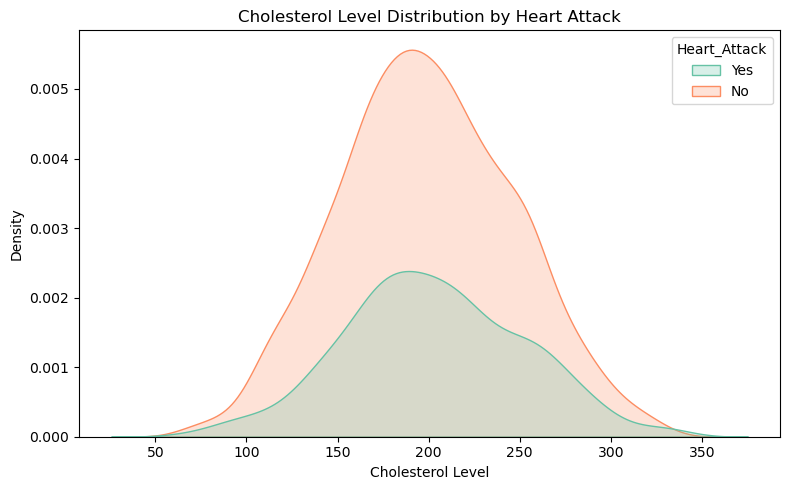

In [24]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='Cholesterol_Level', hue='Heart_Attack', fill=True, palette='Set2')
plt.title("Cholesterol Level Distribution by Heart Attack")
plt.xlabel("Cholesterol Level")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

 ### How does exercise level impact heart attacks?

<Figure size 600x400 with 0 Axes>

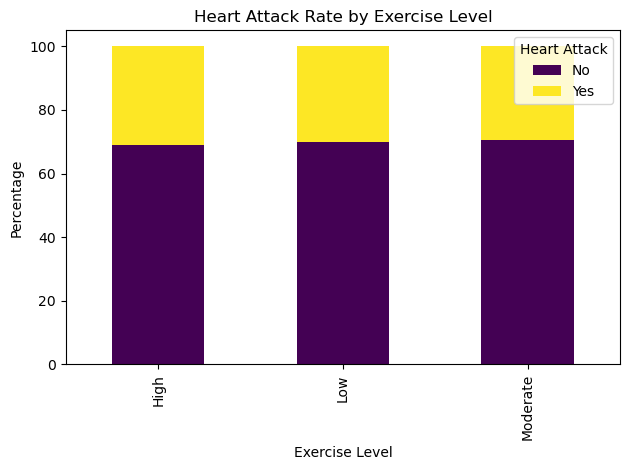

In [26]:
plt.figure(figsize=(6, 4))
exercise_attack = pd.crosstab(data['Exercise_Level'], data['Heart_Attack'], normalize='index') * 100
exercise_attack.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Heart Attack Rate by Exercise Level")
plt.ylabel("Percentage")
plt.xlabel("Exercise Level")
plt.legend(["No", "Yes"], title="Heart Attack")
plt.tight_layout()
plt.show()

## Encoding and Normalization

In [27]:
# Convert binary columns (Yes/No) to 1/0
binary_cols = ['Smoking', 'Diabetes', 'Obesity', 'Family_History', 'Previous_Heart_Issue', 'Heart_Attack']
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [28]:
# Ordinal encoding for Exercise_Level
exercise_map = {'Low': 0, 'Moderate': 1, 'High': 2}
data['Exercise_Level'] = data['Exercise_Level'].map(exercise_map)

In [29]:
# One-hot encoding for nominal columns
data = pd.get_dummies(data, columns=['Gender', 'Region', 'ECG_Result'])


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1992 non-null   int64  
 1   Cholesterol_Level      1992 non-null   float64
 2   BP_Systolic            1992 non-null   int64  
 3   BP_Diastolic           1992 non-null   int64  
 4   Blood_Sugar            1992 non-null   float64
 5   Heart_Rate             1992 non-null   int64  
 6   Smoking                1992 non-null   int64  
 7   Diabetes               1992 non-null   int64  
 8   Obesity                1992 non-null   int64  
 9   Family_History         1992 non-null   int64  
 10  Exercise_Level         1992 non-null   int64  
 11  Previous_Heart_Issue   1992 non-null   int64  
 12  Heart_Attack           1992 non-null   int64  
 13  Gender_Female          1992 non-null   bool   
 14  Gender_Male            1992 non-null   bool   
 15  Region_Ce

In [31]:
# Separate features and target
X = data.drop('Heart_Attack', axis=1)
y = data['Heart_Attack']

In [32]:
# Apply normalization using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Building

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [34]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Logistic Regression:\n", classification_report(y_test, lr.predict(X_test)))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.69      1.00      0.81       274
           1       0.00      0.00      0.00       125

    accuracy                           0.68       399
   macro avg       0.34      0.50      0.41       399
weighted avg       0.47      0.68      0.56       399



In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Before train/test split
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Then split and train
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [38]:
y_pred = model.predict(X_train)


In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred))
print("\nClassification Report:\n", classification_report(y_train, y_pred))
print("Accuracy:", accuracy_score(y_train, y_pred))


Confusion Matrix:
 [[1106    3]
 [ 486  635]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82      1109
           1       1.00      0.57      0.72      1121

    accuracy                           0.78      2230
   macro avg       0.85      0.78      0.77      2230
weighted avg       0.85      0.78      0.77      2230

Accuracy: 0.7807174887892376


In [40]:
import joblib

# Save model and scaler
joblib.dump(best_model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')  

NameError: name 'best_model' is not defined

In [41]:
data.columns


Index(['Age', 'Cholesterol_Level', 'BP_Systolic', 'BP_Diastolic',
       'Blood_Sugar', 'Heart_Rate', 'Smoking', 'Diabetes', 'Obesity',
       'Family_History', 'Exercise_Level', 'Previous_Heart_Issue',
       'Heart_Attack', 'Gender_Female', 'Gender_Male', 'Region_Central',
       'Region_East', 'Region_North', 'Region_Northeast', 'Region_South',
       'Region_West', 'ECG_Result_Abnormal', 'ECG_Result_Borderline',
       'ECG_Result_Normal'],
      dtype='object')